# Analysis of Trump vs Harris Interviews and Podcasts using Frequency Lists

Overview of Frequency Lists:

Frequency lists rank words in a text or corpus by their frequency of appearance, typically from most to least frequent. 
* Token: word-like sequence of characters that fit the criteria you define for a token. Sequences of characters separated by whitespace is a common (although limited) starting point
* Tokenization: process of splitting a text/corpus into a sequence of items (tokens) meeting the definition of a token
* Bigram: sequence of two consecutive tokens


This notebook is organized to guide the analysis step-by-step, starting with data preparation and progressing through multiple comparative analyses. Here’s an overview of the structure:

* Setup

* Loading the Data

* Understanding the Data Structure

* Basic Descriptor Analysis

* Token Frequency Lists

* Bigram Frequency Lists

* Specific Comparative Analysis

### Setup

In [1]:
import os
import string
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk import bigrams

In [2]:
%run functions.ipynb

### Loading the Data

In [3]:
master_list = json.load(open('../data/master_list.json'))
len(master_list)

24

### Understanding the Data Structure and Preparing for Analysis

In [4]:
print('Here is the first entry in the master_list')

master_list[1]

Here is the first entry in the master_list


{'title': 'Harris_CNN',
 'medium': 'harris_interviews',
 'transcript': [['Host',
   'Madam Vice President, Governor Walz, thank you so much for sitting down with me and bringing the bus. The bus tour is well underway here in Georgia. You have less time to make your case to voters than any candidate in modern American history. The voters are really eager to hear what your plans are. If you are elected, what would you do on day one in the White House?'],
  ['Harris',
   'Well, there are a number of things. I will tell you first and foremost, one of my highest priorities is to do what we can to support and strengthen the middle class. When I look at the aspirations, the goals, the ambitions of the American people, I think that people are ready for a new way forward in a way that generations of Americans have been fueled by hope and by optimism. I think, sadly, in the last decade, we have had in the former president someone who has really been pushing an agenda and an environment that is a

In [5]:
# Separate lists for each type of interview or podcast
harris_interviews_toks = []
harris_podcasts_toks = []
trump_interviews_toks = []
trump_podcasts_toks = []

# Filter and append tokens for Harris interviews
for item in master_list:
    if item['medium'] == 'harris_interviews':
        harris_interviews_toks.extend(item['tokens'])
    elif item['medium'] == 'harris_podcasts':
        harris_podcasts_toks.extend(item['tokens'])
    elif item['medium'] == 'trump_interviews':
        trump_interviews_toks.extend(item['tokens'])
    elif item['medium'] == 'trump_podcasts':
        trump_podcasts_toks.extend(item['tokens'])

### Basic Descriptor Analysis

After separating the tokens into the 4 different mediums, we conducted some basic text analysis including, counting the number of tokens, turns, and titles.

How many words (tokens) are in each of the 4 mediums?

In [6]:
print(f"Word Count per Medium: \n"
      f"Harris Interviews: {len(harris_interviews_toks)}\n"
      f"Harris Podcasts: {len(harris_podcasts_toks)}\n"
      f"Trump Interviews: {len(trump_interviews_toks)}\n"
      f"Trump Podcasts: {len(trump_podcasts_toks)}")

Word Count per Medium: 
Harris Interviews: 9542
Harris Podcasts: 30724
Trump Interviews: 17811
Trump Podcasts: 111314


How many titles per medium? How many turns for each title?

In [7]:
medium_title_counts = {}  # To count the number of titles per medium
title_turn_counts = {}  # To store the number of turns for each title

# Iterate through the master_list
for item in master_list:
    # Count the number of titles per medium
    medium = item['medium']
    if medium in medium_title_counts:
        medium_title_counts[medium] += 1
    else:
        medium_title_counts[medium] = 1

    # Count the number of turns for each title
    title = item['title']
    turns = len(item['transcript'])
    title_turn_counts[title] = turns

In [8]:
print("Number of Titles in Each Medium:")
for medium, count in medium_title_counts.items():
    print(f"{medium}: {count}")

print("\nNumber of Turns in Each Title:")
for title, turns in title_turn_counts.items():
    print(f"{title}: {turns}")

Number of Titles in Each Medium:
harris_interviews: 4
harris_podcasts: 5
trump_interviews: 4
trump_podcasts: 11

Number of Turns in Each Title:
Harris_60_Minutes: 68
Harris_CNN: 58
Harris_Fox: 85
Harris_NBC: 68
Harris_All_The_Smoke: 207
Harris_Call_Her_Daddy: 80
Harris_Club_Shay_Shay: 125
Harris_Howard_Stern: 205
Harris_The_Breakfast_Club: 91
Trump_Bloomberg: 103
Trump_Fox_News_Faulkner: 16
Trump_Fox_News_Ingram: 38
Trump_NABJ: 89
Trump_Adin_Ross: 162
Trump_Ben_Shapiro: 21
Trump_Bussin_With_The_Boys: 102
Trump_Elon_Musk: 144
Trump_Flagrant_Podcast: 196
Trump_Impaulsive: 113
Trump_Joe_Rogan: 494
Trump_Lex_Friedman: 81
Trump_Nelk_Boys: 58
Trump_PBD_Podcast: 113
Trump_Theo_Von: 192


Average Number of Turns per Medium

In [9]:
medium_turns = {}  # Total turns for each medium
medium_titles = {}  # Count of titles for each medium

for item in master_list:
    medium = item['medium']
    turns = len(item['transcript'])

    # Accumulate total turns and title count
    if medium in medium_turns:
        medium_turns[medium] += turns
        medium_titles[medium] += 1
    else:
        medium_turns[medium] = turns
        medium_titles[medium] = 1

# Calculate average turns per title
avg_turns_per_medium = {medium: medium_turns[medium] / medium_titles[medium] for medium in medium_turns}

print("Average Number of Turns per Title in Each Medium:")
for medium, avg_turns in avg_turns_per_medium.items():
    print(f"{medium}: {avg_turns:.2f}")

Average Number of Turns per Title in Each Medium:
harris_interviews: 69.75
harris_podcasts: 141.60
trump_interviews: 61.50
trump_podcasts: 152.36


**Observations**

Podcasts have significantly more turns which could reflect the medium's suitability for facilitating conversation

Interviews have fewer turns showing how both candidates take the opportunity to talk more and clarify their positions

Total number of words per title, grouped by medium or title.


In [10]:
medium_word_counts = {}  # Total word count per medium
medium_titles = {}  # Count of titles for each medium

for item in master_list:
    medium = item['medium']
    words = sum(len(turn[1].split()) for turn in item['transcript'])

    # Accumulate word counts and title counts
    if medium in medium_word_counts:
        medium_word_counts[medium] += words
        medium_titles[medium] += 1
    else:
        medium_word_counts[medium] = words
        medium_titles[medium] = 1

# Calculate average word count per title
avg_words_per_title = {medium: medium_word_counts[medium] / medium_titles[medium] for medium in medium_word_counts}

print("Average Word Count per Title in Each Medium:")
for medium, avg_words in avg_words_per_title.items():
    print(f"{medium}: {avg_words:.2f}")

Average Word Count per Title in Each Medium:
harris_interviews: 3993.50
harris_podcasts: 9182.60
trump_interviews: 6011.00
trump_podcasts: 14241.36


**Observations**

Harris
*  Lower word count could mean more targeted messaging making her responses more focused and disgestible

  
Trump

* Higher word could could reflect Trump's strategy to dominate the conversation and emphasize his points through repetition

Average word count per turn per title

In [11]:
# Initialize dictionaries to store data for each medium
word_counts_per_medium = {}
turn_counts_per_medium = {}

# Iterate over each title in the dataset
for item in master_list:
    medium = item['medium']  # e.g., 'harris_interviews'
    transcript = item['transcript']  # List of [speaker, tokens]
    
    # Calculate word count and number of turns for this title
    total_words = sum(len(tokens.split()) if isinstance(tokens, str) else len(tokens) for _, tokens in transcript)
    total_turns = len(transcript)
    
    # Average word count per turn for this title
    avg_word_count_per_turn = total_words / total_turns if total_turns > 0 else 0
    
    # Update dictionaries for the medium
    if medium not in word_counts_per_medium:
        word_counts_per_medium[medium] = []
    word_counts_per_medium[medium].append(avg_word_count_per_turn)

# Calculate overall average word count per turn for each medium
average_word_count_per_medium = {}
for medium, avg_list in word_counts_per_medium.items():
    average_word_count_per_medium[medium] = sum(avg_list) / len(avg_list)

# Display results
print("Average Word Count per Turn per Title:")
for medium, avg_word_count in average_word_count_per_medium.items():
    print(f"{medium}: {avg_word_count:.2f} words per turn per title")

Average Word Count per Turn per Title:
harris_interviews: 58.36 words per turn per title
harris_podcasts: 74.21 words per turn per title
trump_interviews: 105.27 words per turn per title
trump_podcasts: 113.49 words per turn per title


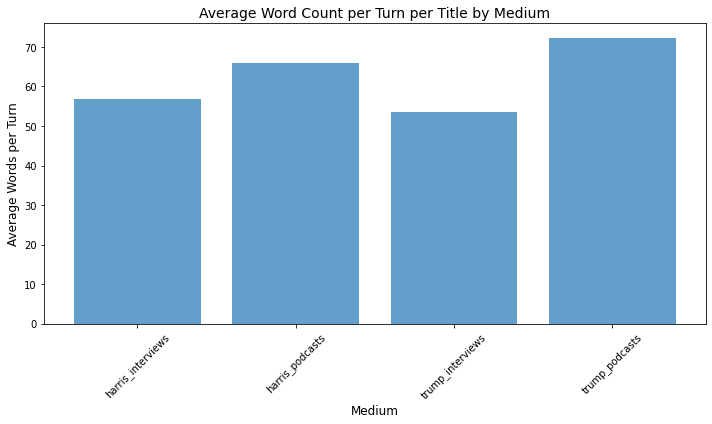

In [12]:
average_word_count_per_medium = {
    "harris_interviews": 56.78,
    "harris_podcasts": 65.90,
    "trump_interviews": 53.45,
    "trump_podcasts": 72.34
}

# Extract keys and values for the bar graph
mediums = list(average_word_count_per_medium.keys())
average_word_counts = list(average_word_count_per_medium.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(mediums, average_word_counts, alpha=0.7)
plt.title("Average Word Count per Turn per Title by Medium", fontsize=14)
plt.xlabel("Medium", fontsize=12)
plt.ylabel("Average Words per Turn", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

### Token Frequency Lists

In [13]:
# Count token frequencies for each list
harris_interviews_freq = Counter(harris_interviews_toks)
harris_podcasts_freq = Counter(harris_podcasts_toks)
trump_interviews_freq = Counter(trump_interviews_toks)
trump_podcasts_freq = Counter(trump_podcasts_toks)

Top 20 Most Common Words in Harris Podcasts and Harris Interviews

In [14]:
harris_podcasts_freq.most_common(50)

[('the', 1194),
 ('and', 1162),
 ('to', 1083),
 ('of', 770),
 ('i', 755),
 ('that', 722),
 ('you', 618),
 ('a', 575),
 ('is', 478),
 ('in', 467),
 ('we', 385),
 ('it', 377),
 ('have', 333),
 ('about', 304),
 ('for', 303),
 ('so', 289),
 ('people', 282),
 ('know', 272),
 ('my', 234),
 ('what', 231),
 ('was', 223),
 ('are', 221),
 ('be', 206),
 ('on', 197),
 ('do', 193),
 ('not', 188),
 ('but', 187),
 ('who', 170),
 ('this', 167),
 ('right', 166),
 ('they', 164),
 ('with', 162),
 ('he', 153),
 ('its', 148),
 ('just', 142),
 ('because', 141),
 ('thats', 139),
 ('your', 138),
 ('our', 135),
 ('their', 117),
 ('at', 115),
 ('when', 114),
 ('work', 113),
 ('as', 112),
 ('dont', 111),
 ('up', 104),
 ('one', 102),
 ('like', 101),
 ('im', 98),
 ('think', 97)]

In [15]:
harris_interviews_freq.most_common(50)

[('the', 452),
 ('to', 353),
 ('and', 332),
 ('of', 275),
 ('that', 274),
 ('i', 210),
 ('a', 196),
 ('in', 161),
 ('is', 152),
 ('we', 142),
 ('have', 134),
 ('you', 108),
 ('what', 104),
 ('it', 95),
 ('people', 86),
 ('on', 80),
 ('for', 77),
 ('are', 77),
 ('be', 76),
 ('about', 74),
 ('do', 71),
 ('with', 70),
 ('not', 70),
 ('my', 64),
 ('has', 59),
 ('president', 59),
 ('who', 58),
 ('american', 55),
 ('our', 52),
 ('would', 49),
 ('as', 47),
 ('im', 45),
 ('he', 45),
 ('so', 44),
 ('this', 44),
 ('was', 43),
 ('will', 41),
 ('they', 39),
 ('their', 37),
 ('going', 36),
 ('states', 35),
 ('know', 34),
 ('which', 34),
 ('donald', 33),
 ('an', 32),
 ('think', 32),
 ('been', 31),
 ('plan', 31),
 ('at', 31),
 ('united', 30)]

**Observations**
* Podcasts: higher frequency of personal pronouns (could reflect more conversational tone)
* Interviews: greater focus on political topics (words like president, american, plan, united)


Top 20 Most Common Words in Trump Podcasts and Trump Interviews

In [16]:
trump_podcasts_freq.most_common(50)

[('i', 4033),
 ('and', 3861),
 ('the', 3479),
 ('a', 3148),
 ('you', 3121),
 ('to', 2318),
 ('it', 2241),
 ('they', 1854),
 ('that', 1833),
 ('of', 1780),
 ('was', 1502),
 ('have', 1423),
 ('but', 1422),
 ('know', 1407),
 ('in', 1282),
 ('he', 1224),
 ('its', 1096),
 ('we', 1028),
 ('is', 936),
 ('people', 879),
 ('so', 783),
 ('do', 750),
 ('said', 712),
 ('were', 688),
 ('think', 658),
 ('like', 637),
 ('with', 630),
 ('this', 629),
 ('very', 627),
 ('dont', 624),
 ('had', 621),
 ('because', 609),
 ('be', 601),
 ('not', 556),
 ('for', 544),
 ('all', 504),
 ('yeah', 482),
 ('if', 473),
 ('no', 470),
 ('are', 469),
 ('would', 467),
 ('me', 465),
 ('hes', 450),
 ('theyre', 444),
 ('right', 437),
 ('on', 434),
 ('what', 434),
 ('going', 430),
 ('one', 429),
 ('just', 426)]

In [17]:
trump_interviews_freq.most_common(50)

[('i', 670),
 ('the', 608),
 ('and', 526),
 ('to', 504),
 ('a', 449),
 ('you', 442),
 ('of', 313),
 ('that', 301),
 ('in', 274),
 ('it', 261),
 ('have', 257),
 ('they', 244),
 ('was', 183),
 ('—', 179),
 ('but', 175),
 ('we', 169),
 ('people', 167),
 ('he', 152),
 ('know', 145),
 ('is', 142),
 ('were', 141),
 ('going', 137),
 ('its', 134),
 ('said', 134),
 ('because', 122),
 ('not', 111),
 ('do', 109),
 ('so', 108),
 ('very', 105),
 ('this', 104),
 ('for', 103),
 ('dont', 102),
 ('our', 98),
 ('theyre', 98),
 ('country', 90),
 ('are', 88),
 ('with', 86),
 ('think', 85),
 ('all', 84),
 ('had', 82),
 ('if', 82),
 ('want', 82),
 ('me', 79),
 ('what', 79),
 ('them', 76),
 ('on', 72),
 ('be', 72),
 ('like', 71),
 ('she', 69),
 ('im', 63)]

**Observations**

Podcasts
* More personal/conversational ('you', 'know', 'yeah', 'don't', 'right, 'just')
* Use of fillers also indicates a more casual style ('so', 'just', 'right', 'very')
* Greater focus on the past ('said', 'were', 'think')
  
Interviews

* Greater focus on political topics ('president', 'american', 'plan', 'united')
* Focus on collective terms ('our', 'country')

### Bigram Frequency Lists

In [18]:
def get_bigram_tokens(tokens):
    return list(bigrams(tokens))

# Get bigrams from each list
harris_interviews_bigrams = get_bigram_tokens(harris_interviews_toks)
harris_podcasts_bigrams = get_bigram_tokens(harris_podcasts_toks)
trump_interviews_bigrams = get_bigram_tokens(trump_interviews_toks)
trump_podcasts_bigrams = get_bigram_tokens(trump_podcasts_toks)

# Count bigram frequencies for each list
harris_interviews_bigrams_freq = Counter(harris_interviews_bigrams)
harris_podcasts_bigrams_freq = Counter(harris_podcasts_bigrams)
trump_interviews_bigrams_freq = Counter(trump_interviews_bigrams)
trump_podcasts_bigrams_freq = Counter(trump_podcasts_bigrams)

Top 20 Most Common Bigrams in Harris Podcasts and Harris Interviews

In [19]:
harris_podcasts_bigrams_freq.most_common(50)

[(('of', 'the'), 176),
 (('you', 'know'), 157),
 (('in', 'the'), 110),
 (('and', 'i'), 108),
 (('to', 'be'), 93),
 (('to', 'do'), 79),
 (('i', 'think'), 69),
 (('we', 'have'), 69),
 (('i', 'was'), 65),
 (('that', 'we'), 61),
 (('need', 'to'), 60),
 (('i', 'mean'), 60),
 (('going', 'to'), 60),
 (('one', 'of'), 59),
 (('have', 'to'), 57),
 (('and', 'then'), 55),
 (('and', 'the'), 54),
 (('part', 'of'), 53),
 (('it', 'is'), 51),
 (('to', 'the'), 51),
 (('and', 'so'), 50),
 (('that', 'i'), 48),
 (('this', 'is'), 47),
 (('a', 'lot'), 47),
 (('have', 'a'), 45),
 (('that', 'is'), 45),
 (('united', 'states'), 43),
 (('i', 'have'), 42),
 (('which', 'is'), 41),
 (('want', 'to'), 41),
 (('lot', 'of'), 41),
 (('is', 'about'), 41),
 (('what', 'we'), 40),
 (('we', 'need'), 40),
 (('donald', 'trump'), 40),
 (('and', 'we'), 39),
 (('and', 'you'), 39),
 (('people', 'who'), 38),
 (('talk', 'about'), 37),
 (('talking', 'about'), 37),
 (('you', 'have'), 37),
 (('of', 'my'), 37),
 (('it', 'was'), 36),
 (('

In [20]:
harris_interviews_bigrams_freq.most_common(50)

[(('of', 'the'), 64),
 (('the', 'american'), 46),
 (('american', 'people'), 39),
 (('we', 'have'), 37),
 (('to', 'do'), 37),
 (('and', 'i'), 33),
 (('what', 'we'), 33),
 (('to', 'be'), 32),
 (('in', 'the'), 32),
 (('going', 'to'), 30),
 (('the', 'united'), 30),
 (('united', 'states'), 30),
 (('i', 'think'), 29),
 (('that', 'is'), 29),
 (('that', 'we'), 28),
 (('i', 'have'), 27),
 (('donald', 'trump'), 27),
 (('do', 'to'), 25),
 (('and', 'the'), 21),
 (('to', 'the'), 19),
 (('we', 'need'), 18),
 (('which', 'is'), 18),
 (('is', 'a'), 18),
 (('on', 'the'), 17),
 (('vice', 'president'), 17),
 (('i', 'will'), 17),
 (('our', 'country'), 16),
 (('i', 'believe'), 16),
 (('have', 'done'), 16),
 (('need', 'to'), 15),
 (('i', 'am'), 15),
 (('it', 'is'), 14),
 (('let', 'me'), 14),
 (('president', 'of'), 14),
 (('for', 'the'), 13),
 (('that', 'the'), 13),
 (('that', 'i'), 13),
 (('has', 'been'), 13),
 (('with', 'the'), 12),
 (('of', 'my'), 12),
 (('to', 'bring'), 12),
 (('tell', 'you'), 12),
 (('an

**Observations**

Podcasts
* Casual/Conversational Language ('you know', 'i mean')
* 40 Oponent Mentions
  
Interviews

* Focus on the audience ('the american', 'american people')
* Focus on current leadership ('vice president', 'joe biden'
* Dicussion of the past ('has been', 'would have', 'have been')
* Future oriented statements ('i will', 'to bring', 'focused on')

Top 20 Most Common Bigrams in Trump Podcasts and Trump Interviews

In [21]:
trump_podcasts_bigrams_freq.most_common(50)

[(('you', 'know'), 1060),
 (('and', 'i'), 558),
 (('it', 'was'), 419),
 (('i', 'think'), 391),
 (('a', 'lot'), 354),
 (('i', 'said'), 323),
 (('going', 'to'), 309),
 (('in', 'the'), 301),
 (('and', 'they'), 301),
 (('i', 'dont'), 293),
 (('i', 'mean'), 263),
 (('lot', 'of'), 258),
 (('i', 'was'), 243),
 (('of', 'the'), 241),
 (('to', 'be'), 240),
 (('was', 'a'), 236),
 (('we', 'have'), 234),
 (('but', 'i'), 233),
 (('have', 'a'), 232),
 (('have', 'to'), 232),
 (('you', 'have'), 231),
 (('and', 'you'), 225),
 (('he', 'was'), 224),
 (('want', 'to'), 203),
 (('and', 'he'), 195),
 (('to', 'do'), 188),
 (('its', 'a'), 180),
 (('do', 'it'), 177),
 (('if', 'you'), 175),
 (('had', 'a'), 166),
 (('they', 'were'), 163),
 (('would', 'have'), 162),
 (('and', 'then'), 160),
 (('a', 'great'), 159),
 (('he', 'said'), 154),
 (('we', 'had'), 152),
 (('i', 'got'), 149),
 (('a', 'very'), 146),
 (('know', 'i'), 144),
 (('and', 'we'), 143),
 (('i', 'had'), 142),
 (('it', 'and'), 136),
 (('that', 'was'), 13

In [22]:
trump_interviews_bigrams_freq.most_common(50)

[(('going', 'to'), 122),
 (('you', 'know'), 94),
 (('and', 'i'), 87),
 (('i', 'said'), 81),
 (('in', 'the'), 68),
 (('i', 'think'), 62),
 (('have', 'to'), 60),
 (('our', 'country'), 54),
 (('we', 'have'), 54),
 (('want', 'to'), 52),
 (('of', 'the'), 50),
 (('i', 'dont'), 43),
 (('a', 'lot'), 42),
 (('to', 'be'), 39),
 (('have', 'a'), 38),
 (('lot', 'of'), 38),
 (('it', 'was'), 37),
 (('you', 'have'), 37),
 (('if', 'you'), 36),
 (('to', 'have'), 35),
 (('a', 'very'), 34),
 (('i', 'was'), 33),
 (('i', 'mean'), 33),
 (('to', 'do'), 32),
 (('but', 'i'), 32),
 (('we', 'had'), 31),
 (('tell', 'you'), 30),
 (('do', 'it'), 30),
 (('were', 'going'), 29),
 (('and', 'he'), 29),
 (('not', 'going'), 28),
 (('they', 'were'), 28),
 (('he', 'was'), 28),
 (('i', 'have'), 28),
 (('united', 'states'), 27),
 (('i', 'got'), 27),
 (('and', 'they'), 26),
 (('look', 'at'), 25),
 (('the', 'united'), 25),
 (('they', 'have'), 25),
 (('the', 'way'), 25),
 (('and', 'you'), 25),
 (('its', 'a'), 24),
 (('by', 'the')

**Observations**

Podcasts
* Casual/Conversational Language ('you know', 'i think', 'i mean', 'i don't')
* First person narratives ('i was', 'i got', 'i had')
* Storytellings ('and then', 'a lot', 'a little')
* Emotional/descriptive language ('a lot', 'a great', 'a very', 'a little')
  
Interviews

* Future oriented statements ('going to', 'have to', 'want to', 'do it')

### Specific Comparative Analysis


In order to compare the frequencies of specific words I need to normalize the data. The raw counts of words in each tokenized dataset are not directly comparable because the total number of words in each medium varies. The code below adds up the total number of words in each text. Next, I chose specific words to analyze and divided the count of each selected word by the total number of words in each category.

In [23]:
harris_interviews_total = len(harris_interviews_toks)
harris_podcasts_total = len(harris_podcasts_toks)
trump_interviews_total = len(trump_interviews_toks)
trump_podcasts_total = len(trump_podcasts_toks)


### Issue Focus

In [24]:
words_to_analyze = ['border', 'security', 'abortion', 'economy', 'inflation', 'immigration', 'healthcare', 'education', 'israel']

In [25]:
data = []
for word in words_to_analyze:
    row = {
        'word': word,
        'Harris Interviews': harris_interviews_freq.get(word, 0) / harris_interviews_total * 100000,
        'Harris Podcasts': harris_podcasts_freq.get(word, 0) / harris_podcasts_total * 100000,
        'Trump Interviews': trump_interviews_freq.get(word, 0) / trump_interviews_total * 100000,
        'Trump Podcasts': trump_podcasts_freq.get(word, 0) / trump_podcasts_total * 100000
    }
    data.append(row)

issues_df = pd.DataFrame(data)

In [26]:
issues_df

,word,Harris Interviews,Harris Podcasts,Trump Interviews,Trump Podcasts
0,border,314.399497,61.840906,129.133681,57.495014
1,security,83.839866,55.331337,16.843524,3.593438
2,abortion,10.479983,32.547845,22.458032,0.000000
3,economy,230.559631,113.917459,28.072539,22.458990
4,inflation,73.359883,16.273923,101.061142,23.357349
5,immigration,115.279816,19.528707,11.229016,5.390158
6,healthcare,0.000000,29.293061,0.000000,0.898360
7,education,10.479983,6.509569,0.000000,3.593438
8,israel,83.839866,0.000000,0.000000,17.068832


**Observations**

* Both candidates discuss these key issues more in interviews than in podcasts
* In Harris's interviews, the term "border" is mentioned the most frequently (314.40 mentions per 100,000 words), indicating a strong focus on immigration-related discussions
* In Trump’s interviews, "border" also appears relatively frequently (129.13 mentions per 100,000 words)

### Opponent Mentions

In [36]:
words_to_analyze1 = ['donald', 'trump', 'harris', 'kamala']

In [37]:
data = []
for word in words_to_analyze1:
    row = {
        'word': word,
        'Harris Interviews': harris_interviews_freq.get(word, 0),
        'Harris Podcasts': harris_podcasts_freq.get(word, 0),
        'Trump Interviews': trump_interviews_freq.get(word, 0),
        'Trump Podcasts': trump_podcasts_freq.get(word, 0)
    }
    data.append(row)

opponent_df = pd.DataFrame(data)

In [38]:
opponent_df

,word,Harris Interviews,Harris Podcasts,Trump Interviews,Trump Podcasts
0,donald,33,46,2,8
1,trump,30,50,6,75
2,harris,0,1,7,2
3,kamala,0,1,3,43


**Observations**

* Harris’s strategy appears opponent-focused, with significantly more mentions of "trump" than Trump mentions of her
* Trump’s approach includes referencing "harris" moderately, with a preference for her last name over her first
* Harris talks more about Trump in interviews while Trump mentions Harris more in podcasts

### Emotional Language

We chose 3 positive emotional words (good, hope, and happy) and 3 negative emotional words (bad, hate, worry). We also analyzed the intensity modifier "very".

In [30]:
words_to_analyze2 = ['good', 'hope', 'happy', 'bad', 'hate', 'worry', 'very']

In [31]:
data = []
for word in words_to_analyze2:
    row = {
        'word': word,
        'Harris Interviews': harris_interviews_freq.get(word, 0) / harris_interviews_total * 100000,
        'Harris Podcasts': harris_podcasts_freq.get(word, 0) / harris_podcasts_total * 100000,
        'Trump Interviews': trump_interviews_freq.get(word, 0) / trump_interviews_total * 100000,
        'Trump Podcasts': trump_podcasts_freq.get(word, 0) / trump_podcasts_total * 100000
    }
    data.append(row)

emotional_df = pd.DataFrame(data)

In [32]:
emotional_df

,word,Harris Interviews,Harris Podcasts,Trump Interviews,Trump Podcasts
0,good,41.919933,74.860044,230.194823,319.816016
1,hope,10.479983,9.764354,5.614508,24.255709
2,happy,0.000000,35.802630,16.843524,11.678675
3,bad,31.439950,16.273923,196.507776,184.163717
4,hate,20.959966,3.254785,11.229016,16.170473
5,worry,0.000000,6.509569,11.229016,0.000000
6,very,241.039614,195.287072,589.523328,563.271466


**Observations**

* Trump uses more emotionally charged words across the board, especially words like "good," "bad," and "very."
* Trump users emotional intensifies more frequently than Harris. Trump's use of "very" is similar in interviews and podcasts, whereas Harris uses the word "very" more in interviews

### Audience Engagement

In [33]:
words_to_analyze3 = ['i', 'you', 'we', 'us', 'together', 'americans']

In [34]:
data = []
for word in words_to_analyze3:
    row = {
        'word': word,
        'Harris Interviews': harris_interviews_freq.get(word, 0) / harris_interviews_total * 100000,
        'Harris Podcasts': harris_podcasts_freq.get(word, 0) / harris_podcasts_total * 100000,
        'Trump Interviews': trump_interviews_freq.get(word, 0) / trump_interviews_total * 100000,
        'Trump Podcasts': trump_podcasts_freq.get(word, 0) / trump_podcasts_total * 100000
    }
    data.append(row)

audience_df = pd.DataFrame(data)

In [35]:
audience_df

,word,Harris Interviews,Harris Podcasts,Trump Interviews,Trump Podcasts
0,i,2200.796479,2457.362323,3761.720285,3623.084248
1,you,1131.838189,2011.456842,2481.612487,2803.780297
2,we,1488.157619,1253.092045,948.851833,923.513664
3,us,178.159715,139.955735,140.362697,80.852364
4,together,73.359883,19.528707,0.000000,26.950788
5,americans,94.319849,48.821768,0.000000,3.593438


**Observations**

* Harris is more focused on the collective in interviews
* 'I' and 'you' are more common in podcasts than collective words which could demonstrate a more conversational tone
